In [1]:
import timeit
import matplotlib.pyplot as plt
import pickle
from time import time
import numpy as np

In [2]:
import sys
sys.path.append("../dnn_from_scratch")

In [3]:
from matplotlib.image import imread
import cv2

In [4]:
def get_batch(st,btsz):
    X_train=[]
    for ii in names[st:st+btsz]:
        img=imread(DATA_DIR+"/"+ii)
        img=cv2.resize(img, dsize=(64,64))#, interpolation=cv2.INTER_CUBIC)
        X_train.append(img/255*2-1)
    return np.asarray(X_train)

In [5]:
from nnet.network import Sequential,layers
from nnet.layers import conv2d,max_pool,flatten,dense,dropout,conv2d,BatchNormalization,Activation
from nnet import functions
from nnet import optimizers
import numpy as np

Seed: 403
Seed: 178


In [6]:
from preprocess import FacialDataset

In [47]:
fd=FacialDataset("dataset/test_frames_keypoints.csv")
fd.load_images('dataset/test/')
fd.resize((128,128))
fd.normalize()

In [48]:
model=Sequential()
model.add(conv2d(32,kernel_size=3,activation=functions.leakyRelu,input_shape=(128,128,1)))
model.add(BatchNormalization())
model.add(max_pool())
model.add(dropout(0.1))
model.add(conv2d(64,kernel_size=3,activation=functions.leakyRelu))
model.add(BatchNormalization())
model.add(max_pool())
model.add(dropout(0.2))
model.add(conv2d(128,kernel_size=3,activation=functions.leakyRelu))
model.add(BatchNormalization())
model.add(max_pool())
model.add(dropout(0.25))
model.add(flatten())
model.add(dense(512,activation=functions.leakyRelu))
model.add(dropout(0.2))
model.add(dense(68*2,activation=functions.sigmoid))

model.summary()

⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽⎽
Layer (type)               Output Shape             Activation        Param #
0 input_layer(InputLayer) (None, 128, 128, 1)        echo             0
__________________________________________________________________________________________
1 conv2d(conv2d)          (None, 128, 128, 32)       leakyRelu        320
__________________________________________________________________________________________
2 BatchNormalization(Batc (None, 128, 128, 32)       echo             128
__________________________________________________________________________________________
3 max_pool(max_pool)      (None, 64, 64, 32)         echo             0
__________________________________________________________________________________________
4 dropout(dropout)        (None, 64, 64, 32)         echo             0
__________________________________________________________________________________________
5 conv2d(con

In [49]:
model.compile(optimizer=optimizers.adam,loss=functions.cross_entropy_with_logits,learning_rate=0.001)

In [51]:
def run():
    btsz=32
    for idx in range(0,len(fd.rsimg),btsz):
        X_inp=fd.rsimg[idx:idx+btsz]
        y_inp=fd.nkpt[idx:idx+btsz].reshape(len(X_inp),-1)
        model.train_on_batch(X_inp,y_inp)
        print("\r{}/{}".format(idx,len(fd.rsimg)),end="")

In [ ]:
epochs=5
for epoch in range(epochs):
    print("EPOCH:",epoch+1,'/',epochs)
    st_tm=time()
    run()
    print("\nEpoch time: {}:{}s".format(int(time()-st_tm)//60,int(time()-st_tm)%60))

EPOCH: 1 / 5
160/770

In [53]:
kk=model.predict(fd.rsimg[64:65])

In [54]:
kk=kk.reshape(-1,2)*128

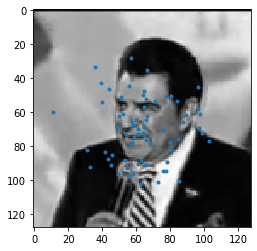

In [55]:
plt.imshow(fd.rsimg[64].squeeze(),cmap='gray')
plt.scatter(kk[:,0],kk[:,1], marker='.')
plt.show()

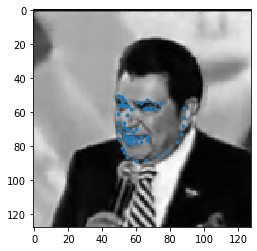

In [56]:
plt.imshow(fd.rsimg[64].squeeze(),cmap='gray')
plt.scatter(fd.rskpt[64][:,0],fd.rskpt[64][:,1], marker='.')
plt.show()